In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
from IPython.display import display

%matplotlib inline

datapath = Path("../data/").resolve()
data = pd.read_pickle(datapath / "flicker_test_logs.pkl")
stats = pd.read_csv(datapath / "flicker_test_stats.csv")

stats["target_interval"] = 1 / stats["target_f"]
stats["pct_err_f"] = 100 * (stats["mean_f"] - stats["target_f"]) / stats["target_f"]
stats["pct_err_interval"] = (
    100 * (2 * stats["mean_interval"] - stats["target_interval"]) / stats["target_interval"]
)
stats = stats.drop(index=0)
targ_f = stats["target_f"]
targ_int = stats["target_interval"]

display(stats)

,trial_number,flicker_freq,duration,trial_start,trial_end,target_f,count_interval,mean_interval,std_interval,min_interval,...,mean_f,std_f,min_f,25%_f,50%_f,75%_f,max_f,target_interval,pct_err_f,pct_err_interval
1,1,2.2,2.0,3.015224,6.017410,2.2,13.0,0.227292,0.003473,0.223578,...,2.200282,0.033514,2.157204,2.161919,2.215440,2.231700,2.236356,0.454545,0.012838,0.008649
2,2,2.4,2.0,6.023450,9.025167,2.4,14.0,0.208395,0.003021,0.205600,...,2.399752,0.034498,2.347323,2.363300,2.420127,2.428513,2.431908,0.416667,-0.010346,0.029703
3,3,2.6,2.0,9.031447,12.033749,2.6,15.0,0.192058,0.003141,0.187411,...,2.604040,0.042937,2.550272,2.571866,2.581239,2.655052,2.667939,0.384615,0.155389,-0.130017
4,4,2.8,2.0,12.039411,15.041212,2.8,16.0,0.178557,0.003419,0.174911,...,2.801193,0.053402,2.733262,2.743839,2.836984,2.846358,2.858598,0.357143,0.042593,-0.008353
5,5,3.0,2.0,15.047559,18.049772,3.0,17.0,0.166597,0.003592,0.162393,...,3.002569,0.064496,2.906938,2.943199,3.050220,3.056515,3.078952,0.333333,0.085630,-0.041984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,285,59.0,2.0,857.288202,860.290033,59.0,354.0,0.008463,0.003815,0.002177,...,69.751602,27.469029,14.324554,41.322816,77.761114,87.032582,229.652765,0.016949,18.223055,-0.132793
286,286,59.2,2.0,860.296173,863.299534,59.2,355.0,0.008439,0.004112,0.002679,...,70.384383,27.192221,12.739405,41.478459,78.139651,87.162008,186.601979,0.016892,18.892539,-0.085402
287,287,59.4,2.0,863.304767,866.305778,59.4,356.0,0.008413,0.004254,0.001969,...,70.969022,28.365830,11.617154,41.539626,77.883498,87.391984,253.974704,0.016835,19.476468,-0.049702
288,288,59.6,2.0,866.311687,869.313969,59.6,357.0,0.008393,0.004176,0.002585,...,71.297843,28.795363,11.936194,41.354099,77.976358,87.135339,193.453532,0.016779,19.627254,0.041361


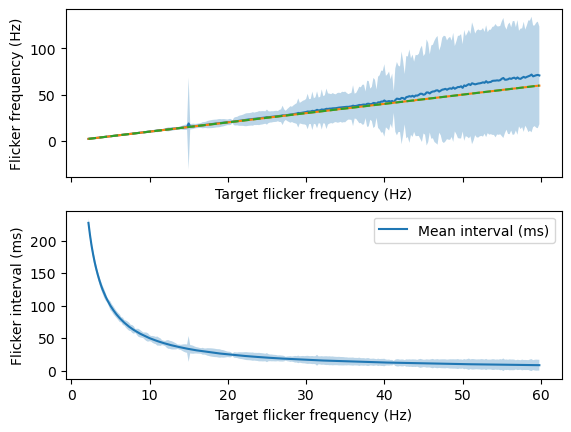

In [2]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(targ_f, stats["mean_f"], label="mean frequency")
ax[0].plot(targ_f, stats["mean_f_old"], label="old mean frequency")
ax[0].fill_between(
    targ_f, stats["mean_f"] - 2 * stats["std_f"], stats["mean_f"] + 2 * stats["std_f"], alpha=0.3
)
ax[0].plot(targ_f, targ_f, "--", label="ideal frequency")
ax[0].set_xlabel("Target flicker frequency (Hz)")
ax[0].set_ylabel("Flicker frequency (Hz)")
ax[1].plot(targ_f, stats["mean_interval"] * 1000, label="Mean interval (ms)")
ax[1].fill_between(
    targ_f,
    (stats["mean_interval"] - 2 * stats["std_interval"]) * 1000,
    (stats["mean_interval"] + 2 * stats["std_interval"]) * 1000,
    alpha=0.3,
)
ax[1].set_xlabel("Target flicker frequency (Hz)")
ax[1].set_ylabel("Flicker interval (ms)")
plt.legend()

(-2.0, 2.0)

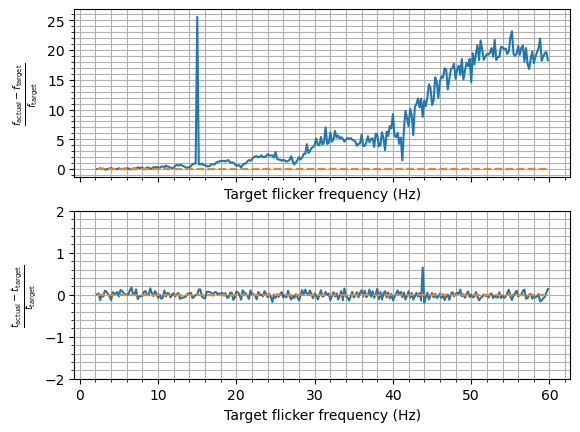

In [4]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].minorticks_on()
ax[1].minorticks_on()
ax[0].grid(visible=True, which="both")
ax[1].grid(visible=True, which="both")
ax[0].plot(targ_f, stats["pct_err_f"], label="Mean frequency error (%)")
ax[0].plot(targ_f, np.zeros_like(targ_f), "--")
ax[0].set_xlabel("Target flicker frequency (Hz)")
ax[0].set_ylabel(r"$\frac{f_{\text{actual}} - f_{\text{target}}}{f_{\text{target}}}$")
ax[1].plot(targ_f, stats["pct_err_interval"], label="Mean interval error (%)")
ax[1].plot(targ_f, np.zeros_like(targ_f), "--")
ax[1].set_xlabel("Target flicker frequency (Hz)")
ax[1].set_ylabel(r"$\frac{t_{\text{actual}} - t_{\text{target}}}{t_{\text{target}}}$")
ax[1].set_ylim([-2, 2])

In [20]:
data["continuous"][0]

{'flicker_switches': [0.006642199994530529,
  0.2553334000403993,
  0.504003600042779,
  0.7586902000475675,
  1.0074862000183202,
  1.255839100049343,
  1.5048363000387326,
  1.7594598000287078,
  2.008615500002634,
  2.2572683000471443,
  2.506089200032875,
  2.754339000035543]}